<h2> load library <h2>

In [1]:
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.utils import shuffle
from keras import backend as K
K.set_image_dim_ordering('th')
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

Using TensorFlow backend.


<h2> Load Model <h2>

In [2]:
import pickle
with open ('model/LDA_mlp.pkl', 'rb') as Rpca:
    model_1= pickle.load(Rpca)

In [3]:
import pickle
with open ('model/model_LDA_mlp.pkl', 'rb') as Rca:
    model_2= pickle.load(Rca)

<h2> Load Folder images for Nama pradiksi <h2>

In [4]:
data_path = os.path.expanduser('data_gambar_sklearn')
data_dir_list = sorted(os.listdir(data_path))

In [5]:
data_nama=[]
for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    data_nama.append(dataset)

In [6]:
list_labels = data_nama
def from_class_to_label(kelas):
    for i in list_labels:
        if kelas==list_labels.index(i):
            return i

print("Fungsi berhasil di load")
print(data_nama)

Fungsi berhasil di load
['Nova', 'Sean', 'Wahyu', 'Welly', 'ardi', 'eko', 'muti', 'unknown']


<h2> Load gambar, Image Processing <h2>

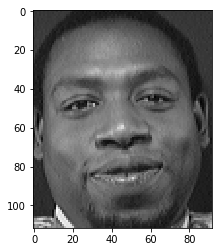

In [7]:
image = cv2.imread('image_test/9.pgm')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hist= cv2.equalizeHist(gray)
test_image=cv2.resize(hist,(112,92))

test_image = np.array(test_image)
test_image = test_image.astype('float64')
test_image /= 255
num_channel=1
if num_channel==1:
    if K.image_dim_ordering()=='th':
        test_image= np.expand_dims(test_image, axis=0)
        test_image= np.expand_dims(test_image, axis=0)
    else:
        test_image= np.expand_dims(test_image, axis=3) 
        test_image= np.expand_dims(test_image, axis=0)
else:
    if K.image_dim_ordering()=='th':
        test_image=np.rollaxis(test_image,2,0)
        test_image= np.expand_dims(test_image, axis=0)
    else:
        test_image= np.expand_dims(test_image, axis=0)
plt.imshow(gray,'gray')

<h2> reshape from 4 to 2 dimensi <h2>

In [8]:
shape = test_image.shape
test_image = test_image.reshape((shape[0], shape[1] * shape[2] * shape[3]))
test_image.shape

(1, 10304)

<h2> tranform with model PCA <h2>

In [9]:
hasil_pca=model_1.transform(test_image)
print(hasil_pca)
print(model_1)

[[ 45.09641757 -12.35816789   7.94006227   6.48765401 -11.49282388
    4.16537494   8.94585863   8.33367643]]
LinearDiscriminantAnalysis(n_components=40, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)


<h2> prediksi with Model MPLC <h2>

In [10]:
hasil_predik= model_2.predict(hasil_pca)[0]
nama = from_class_to_label(hasil_predik)
print('index prediksi :' , hasil_predik)
print('nama Prediksi :' + nama)

index prediksi : 8


TypeError: can only concatenate str (not "NoneType") to str